#### Find longest idle period during iCE40 programming using icoprog in FTDI mode (USBMODE=1)

Run this notebook locally:

    wget http://svn.clifford.at/handicraft/2017/ipynbs/icoprogdbg.ipynb
    wget http://svn.clifford.at/handicraft/2017/ipynbs/icoprogdbg.gz
    jupyter notebook

The captured signal is the SCLK line for programming an entire iCE40 HX8K bit-stream.

14000000 samples (0.27 seconds)


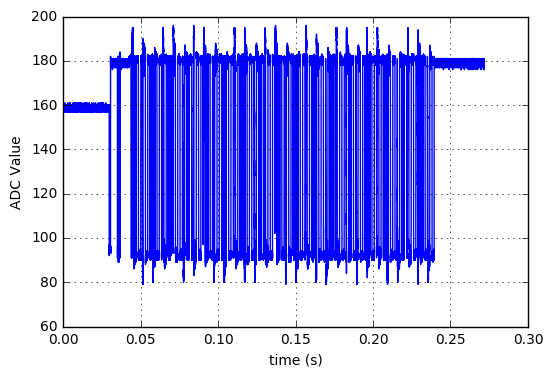

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import gzip

with gzip.open("icoprogdbg.gz", "rb") as f:
    data = np.frombuffer(f.read(), dtype=np.uint8)

samples_to_s = (4*0.5*165e-9) / 17
print("%d samples (%.2f seconds)" % (data.shape[0], samples_to_s*data.shape[0]))

plt.plot(samples_to_s * 25*np.arange(data.shape[0]//25), data[0::25])
plt.ylabel("ADC Value")
plt.xlabel("time (s)")
plt.grid()

In [17]:
# convert to binary
bindat = data > 140

# create a singal that is 1 when the signal is switching
swdat = bindat[:-1] ^ bindat[1:]

# create an array of positions of when the signal is switching
swpos = np.flatnonzero(swdat)

# create an array of lengths of pulses
swlen = np.diff(swpos)

# print 30 longest periods
print("longest pulses:")
print(np.sort(swlen)[-30:])
print()

# print pulses from setup sequence + first two more pulses
print("setup sequence:")
print(swlen[0:20])
print()

# print 20 longest pulses, not including the setup sequence
print("longest non-setup pulses:")
print(np.sort(swlen[18:])[-20:])

longest pulses:
[    42     42     42     42     42     42     42     42     42     42
     42     46   5475   5908   5913   5971   5992   6029   6370   6375
   6379   6379   6388   6391   6396   6396   6454  43804 231751 294933]

setup sequence:
[ 43804 231751   5475   6396   6029   6396   6370   5913   6391   6375
   5992   6379   6454   5908   6388   6379   5971 294933      4      4]

longest non-setup pulses:
[42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 46]


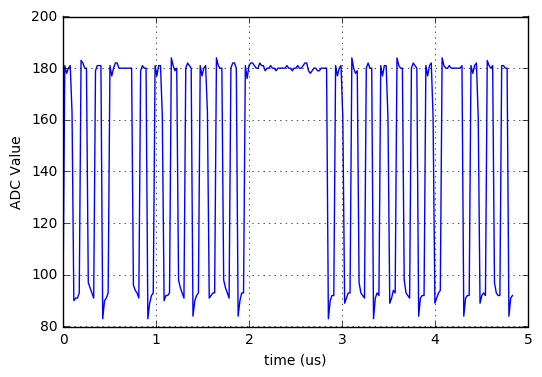

In [3]:
# plot longest pulse not part of the setup sequence (46 samples)

pos = swpos[np.flatnonzero(swlen == 46)[0]]
samples = data[pos - 100:pos + 150]
times = 1e6*samples_to_s * np.arange(len(samples))
plt.plot(times, samples)
plt.ylabel("ADC Value")
plt.xlabel("time (us)")
plt.grid()

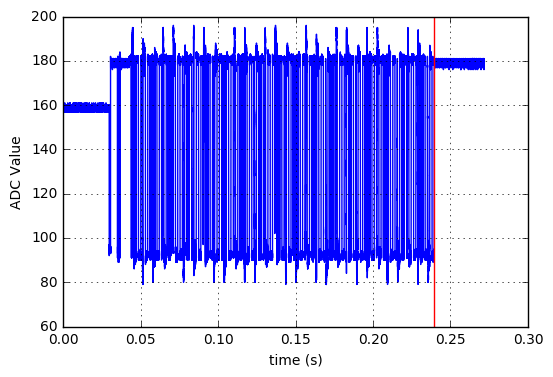

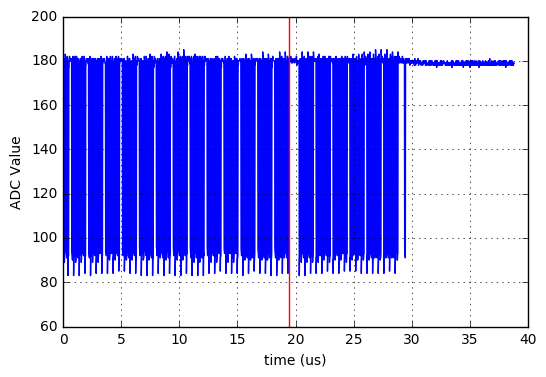

In [15]:
# plot position of longest pulse in complete sequence

plt.figure()
plt.plot(samples_to_s * 25*np.arange(data.shape[0]//25), data[0::25])
plt.plot([samples_to_s * pos] * 2, [60, 200], "r")
plt.ylabel("ADC Value")
plt.xlabel("time (s)")
plt.grid()

plt.figure()
samples = data[pos - 1000:pos + 1000]
times = 1e6*samples_to_s * np.arange(len(samples))
plt.plot(times, samples)
plt.plot([1e6*samples_to_s * 1000] * 2, [60, 200], "r")
plt.ylabel("ADC Value")
plt.xlabel("time (us)")
plt.grid()